In [49]:
import shap
import joblib
from archive.explore_data import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import expit
import xgboost as xgb

In [50]:
# loading model, encoder, & data
model = xgb.XGBClassifier()
model.load_model("xgb_model.json")
le = joblib.load("label_encoder.pkl")
df = load_data()
df['encoded_type'] = le.fit_transform(df['type'])

# features included in model
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'encoded_type']
X = df[features]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

In [51]:
# initialize shap explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [52]:
# save shap values: how much each feature pushed the prediction up/dowm compared to the avg prediction
# positive shap: pushes prediction towards fraud
# pushes prediction towards not fraud
np.save('shap_values.npy', shap_values.values)
np.save('shap_base.npy', shap_values.base_values)
X.to_csv('shap_input.csv', index=False)

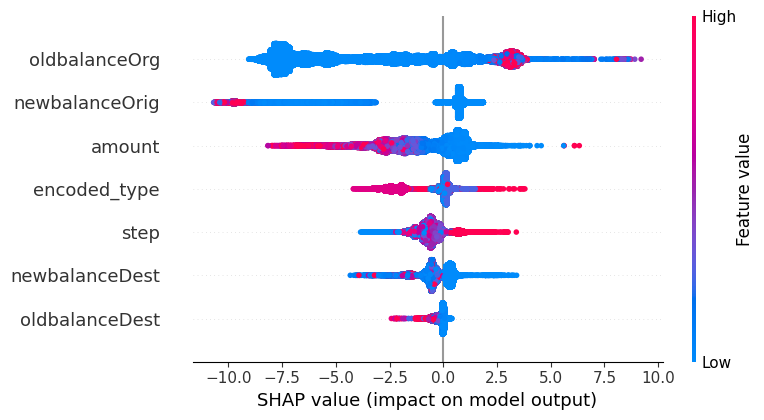

In [53]:
# shap summary plot
shap.summary_plot(shap_values)

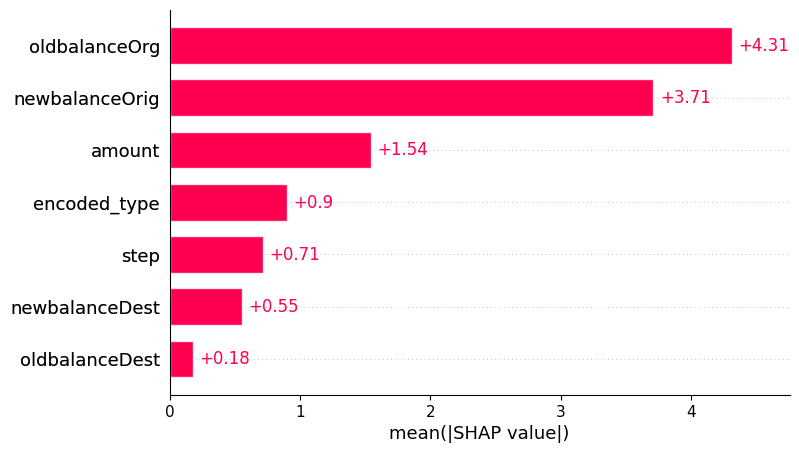

In [54]:
shap.plots.bar(shap_values)


In [55]:
model_base_value = expit(shap_values.base_values.mean())

print("Model base value:", model_base_value)

Model base value: 0.4937132
